KeyboardInterrupt: 

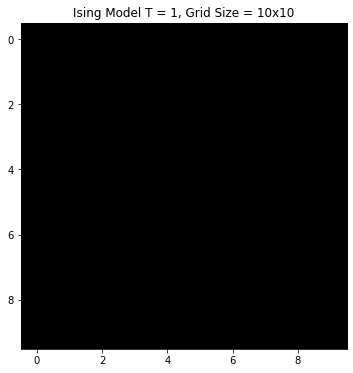

In [1]:
#задание 1 но гиф
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

def initial_state(N):   
    # generuje losowy stan początkowy dla siatki NxN
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    # Monte Carlo move using Metropolis algorithm 
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif np.random.rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def simulate(T, N, steps):
    # symulacja modelu Isinga
    config = initial_state(N)
    fig, ax = plt.subplots(figsize=(6,6))
    img = ax.imshow(config, animated=True, cmap='binary')
    ax.set_title(f"Ising Model T = {T}, Grid Size = {N}x{N}")

    def updatefig(*args):
        img.set_array(mc_move(config, 1.0/T))
        return img,

    ani = animation.FuncAnimation(fig, updatefig, frames=steps, interval=50, blit=True)
    ani.save(f'Ising_Model_T_{T}_Grid_{N}x{N}.gif', writer='pillow')
    plt.close()

# ustalamy parametry symulacji
grid_sizes = [10, 80]         # rozmiary siatek
temperatures = [1, 2.26, 4]           # temperatury
steps   = 100                         # liczba kroków

for N in grid_sizes:
    for T in temperatures:
        simulate(T, N, steps)

In [28]:
#задание 1 но рисунки
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    N = config.shape[0]
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  config[a, b]
            nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
            cost = 2*s*nb
            if cost < 0 or np.random.rand() < np.exp(-cost*beta):
                s *= -1
            config[a, b] = s
    return config

def simulate(T, N, steps):
    config = initial_state(N)
    plt.figure(figsize=(6,6))
    plt.imshow(config, cmap='binary')
    plt.title(f"Initial Ising Model T = {T}, Grid Size = {N}x{N}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(f'Initial_Ising_Model_T_{T}_Grid_{N}x{N}.png')
    plt.close()

    for _ in range(steps):
        config = mc_move(config, 1.0/T)

    plt.figure(figsize=(6,6))
    plt.imshow(config, cmap='binary')
    plt.title(f"Ising Model T = {T}, Grid Size = {N}x{N}, Steps = {steps}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(f'Ising_Model_T_{T}_Grid_{N}x{N}_Steps_{steps}.png')
    plt.close()

grid_sizes = [10, 20, 40, 80]
temperatures = [1, 2.26, 4]
steps   = 100

for N in grid_sizes:
    for T in temperatures:
        simulate(T, N, steps)


In [21]:
#задание 2
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):   
    # generuje losowy stan początkowy dla siatki NxN
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    # Monte Carlo move using Metropolis algorithm 
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif np.random.rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def simulate(T, N, steps):
    # symulacja modelu Isinga
    config = initial_state(N)
    configs = [config.copy()]
    for _ in range(steps):
        config = mc_move(config, 1.0/T)
        configs.append(config.copy())
    return configs

# ustalamy parametry symulacji
grid_sizes = [10, 20, 40, 80]         # rozmiary siatek
T = 1                                 # temperatura
steps   = 100                         # liczba kroków
num_traj = 10                         # liczba trajektorii

for N in grid_sizes:
    configs = simulate(T, N, steps)
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(num_traj):
        ax.imshow(configs[i], cmap='binary', alpha=(i+1)/num_traj)
    ax.set_title(f"Ising Model T = {T}, Grid Size = {N}x{N}, Steps = {steps}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.savefig(f'Ising_Model_T_{T}_Grid_{N}x{N}_Trajectories.png')
    plt.close()


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    N = config.shape[0]
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  config[a, b]
            nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
            cost = 2*s*nb
            if cost < 0 or np.random.rand() < np.exp(-cost*beta):
                s *= -1
            config[a, b] = s
    return config

def simulate(T, N, steps):
    config = initial_state(N)
    plt.figure(figsize=(6,6))
    plt.imshow(config, cmap='plasma')
    plt.title(f"Initial Ising Model T = {T}, Grid Size = {N}x{N}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(f'Initial_Ising_Model_T_{T}_Grid_{N}x{N}.png')
    plt.close()

    for _ in range(steps):
        config = mc_move(config, 1.0/T)

    plt.figure(figsize=(6,6))
    plt.imshow(config, cmap='plasma')
    plt.title(f"Ising Model T = {T}, Grid Size = {N}x{N}, Steps = {steps}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(f'Ising_Model_T_{T}_Grid_{N}x{N}_Steps_{steps}.png')
    plt.close()

grid_sizes = [10, 20, 40, 80]
temperatures = [1, 2.26, 4]
steps   = 100

for N in grid_sizes:
    for T in temperatures:
        simulate(T, N, steps)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    N = config.shape[0]
    for i in range(N):
        for j in range(N):
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s =  config[a, b]
            nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
            cost = 2*s*nb
            if cost < 0 or np.random.rand() < np.exp(-cost*beta):
                s *= -1
            config[a, b] = s
    return config

def calculate_avg_spin(config):
    # Calculate the average spin of the configuration
    return np.mean(config)

def simulate(T, N, steps):
    # Initialize the spins and store the initial configuration
    config = initial_state(N)
    initial_avg_spin = calculate_avg_spin(config)
    
    avg_spins = [initial_avg_spin]
    
    # Perform the Monte Carlo steps and calculate the average spin after each step
    for _ in range(steps):
        config = mc_move(config, 1.0/T)
        avg_spin = calculate_avg_spin(config)
        avg_spins.append(avg_spin)
    
    return avg_spins

# Set the parameters for the simulation
grid_sizes = [10, 20, 40, 80]
T = 1
steps = 100

# Create a plot for each grid size
for i, N in enumerate(grid_sizes):
    avg_spins = simulate(T, N, steps)
    
    plt.figure(i)
    plt.plot(range(steps+1), avg_spins)
    plt.title(f"Single trajectory T= {T} for Grid Size {N}x{N}")
    plt.xlabel("Step")
    plt.ylabel("Average Spin")
    plt.ylim(-1, 1)
    plt.savefig(f'Average_Spin_Trajectory_{N}x{N}.png')
    plt.close()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_avg_spin(config):
    return np.mean(config)

def simulate(T, N, steps):
    config = initial_state(N)
    avg_spins = [calculate_avg_spin(config)]
    for _ in range(steps):
        config = mc_move(config, 1.0/T)
        avg_spins.append(calculate_avg_spin(config))
    return avg_spins

grid_sizes = [10, 20, 40, 80]
T = 1
steps = 100
num_trajectories = 10

for i, N in enumerate(grid_sizes):
    plt.figure(i, figsize=(10, 6))
    for j in range(num_trajectories):
        avg_spins = simulate(T, N, steps)
        plt.plot(range(steps+1), avg_spins, label=f'Trajectory {j+1}')
    plt.title(f"Single trajectory T= {T} for Grid Size {N}x{N}")
    plt.xlabel("Step")
    plt.ylabel("m")
    plt.ylim(-1, 1)
    plt.savefig(f'Average_Spin_Trajectories_{N}x{N}.png')
    plt.close()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_avg_spin(config):
    return np.mean(config)

def simulate(T, N, steps):
    config = initial_state(N)
    avg_spins = [calculate_avg_spin(config)]
    for _ in range(steps):
        config = mc_move(config, 1.0/T)
        avg_spins.append(calculate_avg_spin(config))
    return avg_spins

grid_sizes = [10, 20, 40, 80]
temperatures = [2.0, 2.269, 2.5]  # T < T*, T = T*, T > T*
steps = 100
num_trajectories = 10

for i, N in enumerate(grid_sizes):
    for j, T in enumerate(temperatures):
        plt.figure(i*len(temperatures) + j, figsize=(10, 6))
        for k in range(num_trajectories):
            avg_spins = simulate(T, N, steps)
            plt.plot(range(steps+1), avg_spins, label=f'Trajectory {k+1}')
        plt.title(f"SIngle Trajectories T = {T} for Grid Size {N}x{N} at T = {T}")
        plt.xlabel("Step")
        plt.ylabel("m")
        plt.ylim(-1, 1)
        plt.savefig(f'Average_Spin_Trajectories_{N}x{N}_T_{T}.png')
        plt.close()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_avg_spin(config):
    # Calculate the average spin of the configuration
    return np.mean(config)

def simulate(T, N, steps):
    # Initialize the spins and store the initial configuration
    config = initial_state(N)
    initial_avg_spin = calculate_avg_spin(config)
    
    avg_spins = [initial_avg_spin]
    
    # Perform the Monte Carlo steps and calculate the average spin after each step
    for _ in range(steps):
        config = mc_move(config, 1.0/T)
        avg_spin = calculate_avg_spin(config)
        avg_spins.append(avg_spin)
    
    return avg_spins

# Set the parameters for the simulation
grid_sizes = [10, 20, 40, 80]
temperatures = [1.0, 2.269, 4.0]  # T < T*, T = T*, T > T*
steps = 100

# Create a plot for each grid size and temperature
for i, N in enumerate(grid_sizes):
    for j, T in enumerate(temperatures):
        avg_spins = simulate(T, N, steps)
        
        plt.figure(i*len(temperatures) + j)
        plt.plot(range(steps+1), avg_spins)
        plt.title(f"Single trajectory T= {T} for Grid Size {N}x{N}")
        plt.xlabel("Step")
        plt.ylabel("Average Spin")
        plt.ylim(-1, 1)
        plt.savefig(f'Average_Spin_Trajectory_{N}x{N}_T_{T}.png')
        plt.close()


KeyboardInterrupt: 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mc_move(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif np.random.rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calculate_magnetization(config):
    mag = np.sum(config)
    return mag

def calculate_susceptibility(magnetizations, temperature):
    return np.var(magnetizations) / temperature

grid_sizes = [10, 20, 40, 80]
temperatures = np.linspace(0.5, 3.5, 100)
steps = 1000

magnetizations = np.zeros((len(grid_sizes), len(temperatures)))
susceptibilities = np.zeros((len(grid_sizes), len(temperatures)))

for i, N in enumerate(grid_sizes):
    for j, T in enumerate(temperatures):
        config = initial_state(N)
        mags = []
        for _ in range(steps):
            config = mc_move(config, 1.0/T)
            mags.append(calculate_magnetization(config))
        magnetizations[i, j] = np.mean(np.abs(mags))
        susceptibilities[i, j] = calculate_susceptibility(mags, T)

plt.figure()
for i, N in enumerate(grid_sizes):
    plt.plot(temperatures, magnetizations[i], label=f'L={N}')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.legend()
plt.show()

plt.figure()
for i, N in enumerate(grid_sizes):
    plt.plot(temperatures, susceptibilities[i], label=f'L={N}')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.legend()
plt.show()
        

KeyboardInterrupt: 